##### Source of the dataset:
https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("vgsales.csv") 

In [3]:
pd.set_option("display.max_rows", 7)

df     

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...,...,...
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


Here we don't have a primary key, that is to say a unique value that identifies a specific row 
and column (usually in the datasets the column "ID" is the primary key)

We delete the ""Rank" column from our dataset  - NOTE: we create a copy of the original dataset! 
We don't touch the original dataset

In [4]:
df2 = df.drop(columns=['Rank']).copy()    # another way: df_new = df.drop('Rank', axis=1).copy()
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...,...
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
16597,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


We rename the column "Other_Sales" into "Other_Countries_Sales"

In [5]:
df2.rename(columns={'Other_Sales':'Other_Countries_Sales'}, inplace=True)
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...,...
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
16597,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   16598 non-null  object 
 1   Platform               16598 non-null  object 
 2   Year                   16327 non-null  float64
 3   Genre                  16598 non-null  object 
 4   Publisher              16540 non-null  object 
 5   NA_Sales               16598 non-null  float64
 6   EU_Sales               16598 non-null  float64
 7   JP_Sales               16598 non-null  float64
 8   Other_Countries_Sales  16598 non-null  float64
 9   Global_Sales           16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


Since "Year" is a "float" Datatype, I want to convert it into a "integer" datatype. 
First let's make sure there are no  NaN (not a number) values:

In [7]:
df2['Year'].isna().sum()

271

Since there are 271 NaN values (empty cells, missing values), the conversion into integer wouldn't work. Hence we have to fill the NaN values with "0":

In [8]:
df2['Year'] = df2['Year'].fillna(0)

Now we can convert the column "Year" from float into integer:

In [9]:
df2['Year'] = df2['Year'].astype('int')


Now we can see that the variable "Year" has the new datatype "integer":

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   16598 non-null  object 
 1   Platform               16598 non-null  object 
 2   Year                   16598 non-null  int32  
 3   Genre                  16598 non-null  object 
 4   Publisher              16540 non-null  object 
 5   NA_Sales               16598 non-null  float64
 6   EU_Sales               16598 non-null  float64
 7   JP_Sales               16598 non-null  float64
 8   Other_Countries_Sales  16598 non-null  float64
 9   Global_Sales           16598 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.2+ MB


 SUMMARY STATISTICS ON NUMERICAL COLUMNS

In [11]:
df2.describe()    

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,1973.647307,0.264667,0.146652,0.077782,0.048063,0.537441
std,254.346809,0.816683,0.505351,0.309291,0.188588,1.555028
...,...,...,...,...,...,...
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


We create a new dataframe in which the column "Name" is the index: this column will be the reference column in this
new dataframe

In [12]:
df3 = df2.copy()
df3.set_index("Name", inplace = True)

In [13]:
df3

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
Name,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...
SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


## Which games are best sellers?

We create a function that shows the games that are best sellers.

"n" = how many games we want to have displayed in the ranking? Let's say 10

"by" = by which criterium do we want to sort the best videogames?  We chose the criterium "Region"


In [14]:
def best_seller(n, by, ascending = False, min_sales=0):

    df4 = df3.loc[(df3.Global_Sales>min_sales) & (df3.EU_Sales>min_sales) & (df3.NA_Sales>min_sales) 
                     & (df3.JP_Sales>min_sales) & (df3.Other_Countries_Sales>min_sales),  ["Platform", "Genre", "Year",by]].sort_values(by = by, ascending=False).head(n).copy()
    return df4
    
    

In [15]:
best_seller(n = 10, by = "JP_Sales")

,Platform,Genre,Year,JP_Sales
Name,,,,
Pokemon Red/Pokemon Blue,GB,Role-Playing,1996,10.22
Pokemon Gold/Pokemon Silver,GB,Role-Playing,1999,7.20
Super Mario Bros.,NES,Platform,1985,6.81
...,...,...,...,...
Animal Crossing: Wild World,DS,Simulation,2005,5.33
Brain Age 2: More Training in Minutes a Day,DS,Puzzle,2005,5.32
New Super Mario Bros. Wii,Wii,Platform,2009,4.70


In [16]:
best_seller(n = 10, by = "EU_Sales")

,Platform,Genre,Year,EU_Sales
Name,,,,
Wii Sports,Wii,Sports,2006,29.02
Mario Kart Wii,Wii,Racing,2008,12.88
Wii Sports Resort,Wii,Sports,2009,11.01
...,...,...,...,...
Wii Play,Wii,Misc,2006,9.20
Pokemon Red/Pokemon Blue,GB,Role-Playing,1996,8.89
Wii Fit Plus,Wii,Sports,2009,8.59


In [17]:
best_seller(n = 10, by = "NA_Sales")

,Platform,Genre,Year,NA_Sales
Name,,,,
Wii Sports,Wii,Sports,2006,41.49
Super Mario Bros.,NES,Platform,1985,29.08
Duck Hunt,NES,Shooter,1984,26.93
...,...,...,...,...
New Super Mario Bros. Wii,Wii,Platform,2009,14.59
Wii Play,Wii,Misc,2006,14.03
Super Mario World,SNES,Platform,1990,12.78


In [18]:
best_seller(n = 10, by = "Other_Countries_Sales")

,Platform,Genre,Year,Other_Countries_Sales
Name,,,,
Grand Theft Auto: San Andreas,PS2,Action,2004,10.57
Wii Sports,Wii,Sports,2006,8.46
Gran Turismo 4,PS2,Racing,2004,7.53
...,...,...,...,...
Wii Play,Wii,Misc,2006,2.85
Nintendogs,DS,Simulation,2005,2.75
Call of Duty: Black Ops II,PS3,Shooter,2012,2.52


In [19]:
best_seller(n = 10, by = "Global_Sales")

,Platform,Genre,Year,Global_Sales
Name,,,,
Wii Sports,Wii,Sports,2006,82.74
Super Mario Bros.,NES,Platform,1985,40.24
Mario Kart Wii,Wii,Racing,2008,35.82
...,...,...,...,...
Wii Play,Wii,Misc,2006,29.02
New Super Mario Bros. Wii,Wii,Platform,2009,28.62
Duck Hunt,NES,Shooter,1984,28.31


In [20]:
df3

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
Name,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...
SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


What are the gaming platforms appearing in this dataset?

In [21]:
df3["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Frequencies of the gaming platforms in the whole dataset: which gaming platforms appear most?

In [22]:
df3["Platform"].value_counts()

DS      2163
PS2     2161
PS3     1329
        ... 
TG16       2
GG         1
PCFX       1
Name: Platform, Length: 31, dtype: int64

Frequencies of the gaming genre in the whole dataset: which genre appear most?

In [23]:
df3["Genre"].value_counts()

Action      3316
Sports      2346
Misc        1739
            ... 
Fighting     848
Strategy     681
Puzzle       582
Name: Genre, Length: 12, dtype: int64

## Find a game
### Search 1: "Mario" games

As next task we want to get relevant information about all "Mario" games. We will start from the dataframe "df2":

In [24]:
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...,...
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
16597,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In the next lines we will search for the string "Mario".

But the dataframes will return non-mario games as well, as long as the word "Mario" has been detected (e.g. "Detective Conad: MARIOnette Symphony", row 13273):

In [41]:
pd.set_option("display.max_rows", 10)
mario_games= df2.Name.str.contains("Mario")  
mario_games
df2.loc[mario_games, ["Name", "Year", "Platform", "Global_Sales"]]

,Name,Year,Platform,Global_Sales
1,Super Mario Bros.,1985,NES,40.24
2,Mario Kart Wii,2008,Wii,35.82
6,New Super Mario Bros.,2006,DS,30.01
8,New Super Mario Bros. Wii,2009,Wii,28.62
11,Mario Kart DS,2005,DS,23.42
...,...,...,...,...
12770,Dance Dance Revolution: Mario Mix (JP sales),2005,GC,0.06
13273,Detective Conan: Marionette Symphony,2013,3DS,0.05
15261,Mario Tennis,0,3DS,0.02
16357,Mario vs. Donkey Kong: Tipping Stars,2015,WiiU,0.01


We have to change the search criteria.

In the command below we add a regex, to make sure that the search is only for the word "Mario":

In [43]:
mario_games= df2.Name.str.contains(('(?:\s|^|[,;])Mario(?:\s|$|[,;])'))  

Now we obtained exclusively "Mario" games:

In [44]:
df2.loc[mario_games, ["Name", "Platform"]]

,Name,Platform
1,Super Mario Bros.,NES
2,Mario Kart Wii,Wii
6,New Super Mario Bros.,DS
8,New Super Mario Bros. Wii,Wii
11,Mario Kart DS,DS
...,...,...
12373,Mario vs. Donkey Kong: Tipping Stars,3DS
12770,Dance Dance Revolution: Mario Mix (JP sales),GC
15261,Mario Tennis,3DS
16357,Mario vs. Donkey Kong: Tipping Stars,WiiU


## Graphic representation of "Mario" best sellers

In [28]:
#pd.options.display.max_rows = 20
df7 = df2.loc[mario_games, ["Name", "Global_Sales"]].head(20)
df7.set_index("Name", inplace = True)
df7

,Global_Sales
Name,
Super Mario Bros.,40.24
Mario Kart Wii,35.82
New Super Mario Bros.,30.01
...,...
Mario Party DS,9.02
Super Mario Kart,8.76
Mario Party 8,8.42


In [29]:
df8 = df7.sort_values(by='Global_Sales').copy()
df8

,Global_Sales
Name,
Mario Party 8,8.42
Super Mario Kart,8.76
Mario Party DS,9.02
...,...
New Super Mario Bros.,30.01
Mario Kart Wii,35.82
Super Mario Bros.,40.24


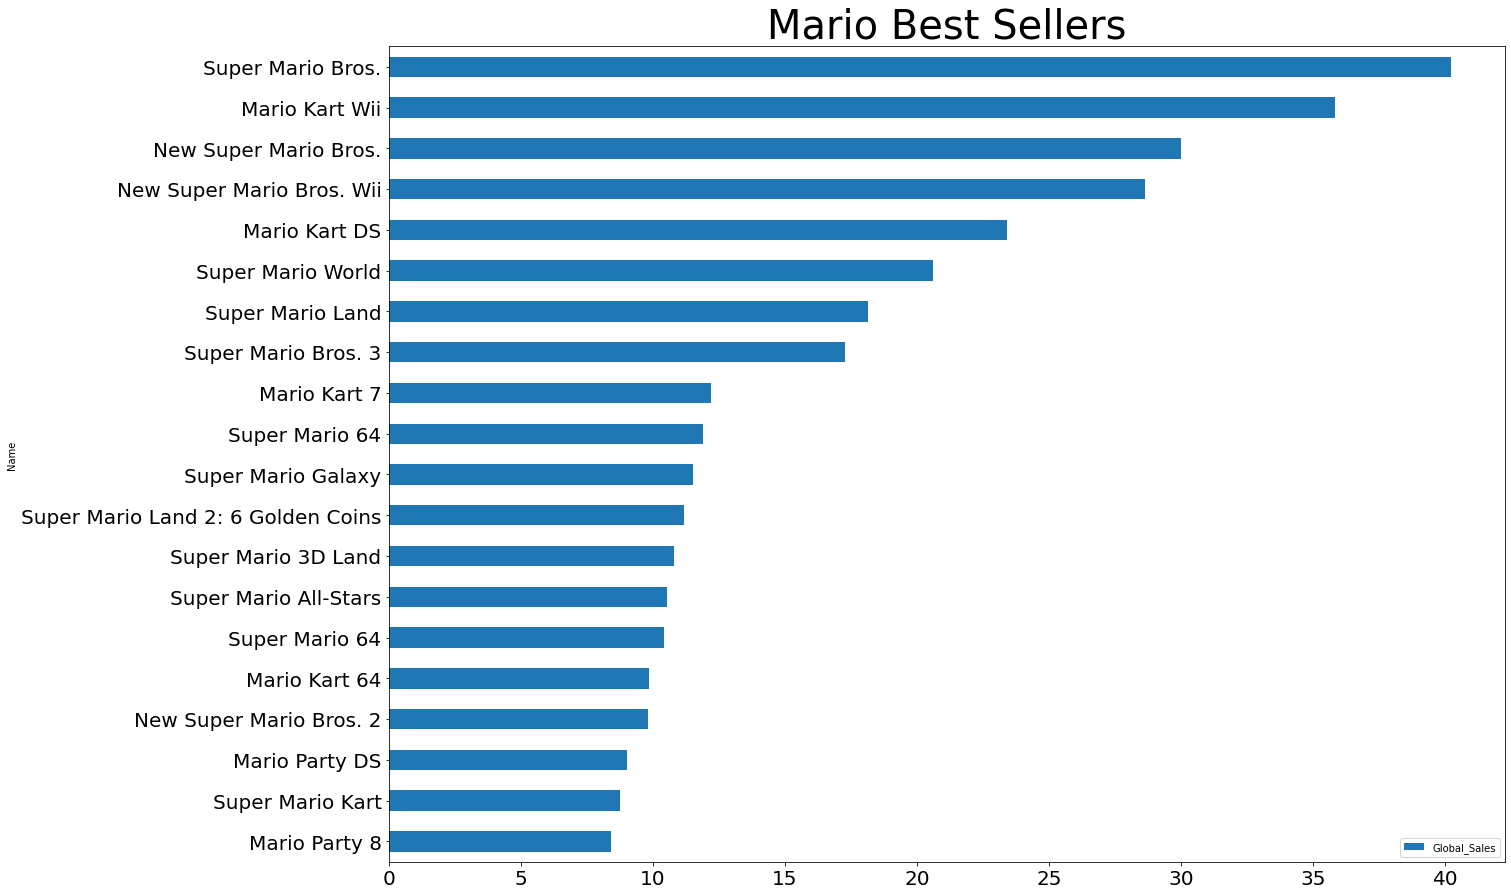

In [30]:
import matplotlib.pyplot as plt
import numpy as np 

df8.plot(kind='barh',figsize = (20, 15), width=0.5, fontsize = 20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.title("Mario Best Sellers", fontsize = 40)
plt.show()

Which platform created most "Mario" games?

In [45]:
df6 = df2.loc[mario_games, ["Name", "Platform"]].copy()
df6["Platform"].value_counts()

Wii     16
GBA     16
3DS     14
GC      12
DS      11
        ..
WiiU     9
SNES     8
GB       7
NES      6
2600     1
Name: Platform, Length: 11, dtype: int64

# Wordclouds

In [46]:
from wordcloud import WordCloud

In [47]:
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [48]:
name = df2.Name
games = " ".join(name)
games

"Wii Sports Super Mario Bros. Mario Kart Wii Wii Sports Resort Pokemon Red/Pokemon Blue Tetris New Super Mario Bros. Wii Play New Super Mario Bros. Wii Duck Hunt Nintendogs Mario Kart DS Pokemon Gold/Pokemon Silver Wii Fit Wii Fit Plus Kinect Adventures! Grand Theft Auto V Grand Theft Auto: San Andreas Super Mario World Brain Age: Train Your Brain in Minutes a Day Pokemon Diamond/Pokemon Pearl Super Mario Land Super Mario Bros. 3 Grand Theft Auto V Grand Theft Auto: Vice City Pokemon Ruby/Pokemon Sapphire Pokemon Black/Pokemon White Brain Age 2: More Training in Minutes a Day Gran Turismo 3: A-Spec Call of Duty: Modern Warfare 3 Pokémon Yellow: Special Pikachu Edition Call of Duty: Black Ops Pokemon X/Pokemon Y Call of Duty: Black Ops 3 Call of Duty: Black Ops II Call of Duty: Black Ops II Call of Duty: Modern Warfare 2 Call of Duty: Modern Warfare 3 Grand Theft Auto III Super Smash Bros. Brawl Call of Duty: Black Ops Animal Crossing: Wild World Mario Kart 7 Halo 3 Grand Theft Auto V P

In [51]:
games_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(games)
games_wordcloud

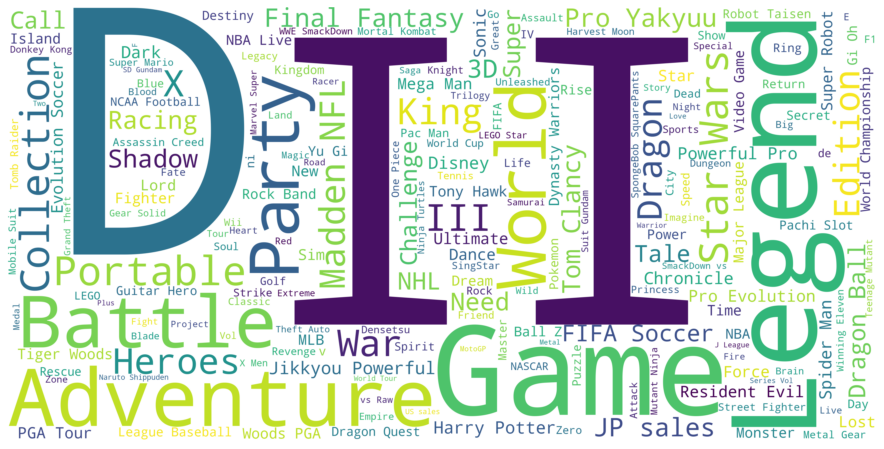

In [52]:
plt.figure(figsize=(16,8))
plt.imshow(games_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

The wordcloud above shows the ancient roman number "II" as biggest result: this is because the wordcloud counted
all games that are sequels. Therefore for the next wordcloud I am going to remove all numbers that are the
sequel of a game:

In [53]:
df4 = df2[df2["Name"].str.contains("I|II|III|IV|V|1|2|3|4|5|6") == False] 
df4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Countries_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16588,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16589,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16590,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01
16592,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01


In [54]:
name = df4.Name
games = " ".join(name)
games

"Wii Sports Super Mario Bros. Mario Kart Wii Wii Sports Resort Pokemon Red/Pokemon Blue Tetris New Super Mario Bros. Wii Play New Super Mario Bros. Wii Duck Hunt Nintendogs Mario Kart DS Pokemon Gold/Pokemon Silver Wii Fit Wii Fit Plus Kinect Adventures! Grand Theft Auto: San Andreas Super Mario World Brain Age: Train Your Brain in Minutes a Day Pokemon Diamond/Pokemon Pearl Super Mario Land Pokemon Ruby/Pokemon Sapphire Pokemon Black/Pokemon White Pokémon Yellow: Special Pikachu Edition Call of Duty: Black Ops Pokemon X/Pokemon Y Super Smash Bros. Brawl Call of Duty: Black Ops Animal Crossing: Wild World Mario Kart 7 Pokemon HeartGold/Pokemon SoulSilver Super Mario Galaxy Pokemon Omega Ruby/Pokemon Alpha Sapphire Gran Turismo Super Mario All-Stars Pokemon FireRed/Pokemon LeafGreen Call of Duty: Ghosts Halo: Reach Call of Duty: Ghosts Donkey Kong Country Minecraft Animal Crossing: New Leaf Mario Party DS Super Mario Kart Wii Party Mario Party 8 GoldenEye 007 Mario & Sonic at the Olympi

In [57]:
games_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(games)
games_wordcloud

The following wordcloud makes more sense, because it is not biased by the numbers of the sequel games: 

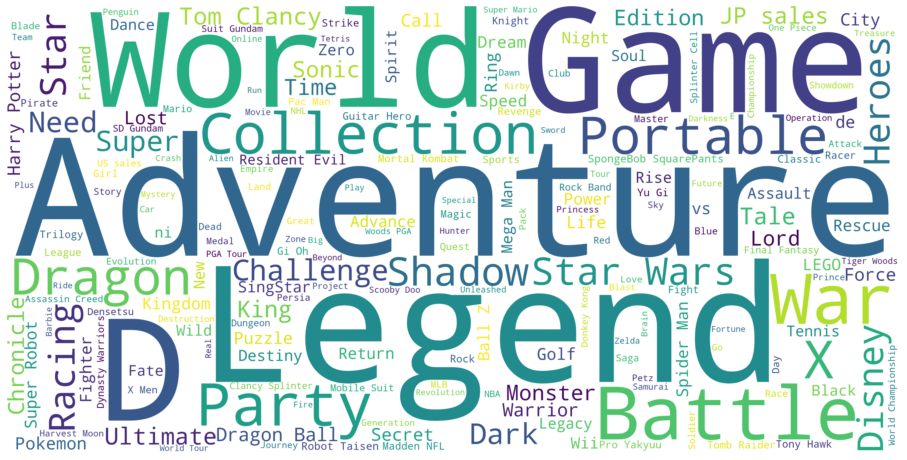

In [61]:
plt.figure(figsize=(16,16))
plt.imshow(games_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()